<a href="https://colab.research.google.com/github/guilhermeterenciani/IA/blob/main/09_flickr_treino_Professor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import urllib.request
import os
from PIL import Image,ImageStat
import numpy as np
import matplotlib.pyplot as plt

import torchvision
import torch
import torch.nn as nn
from torch.utils.data import  DataLoader
import torchvision.transforms as transforms

from torch import optim
import sklearn.metrics as metrics

In [ ]:
import torch.nn.functional as F

#Rede Convolucional

In [ ]:
                #(batch,channels,height,width)


In [ ]:
conv1 = nn.Conv2d(in_channels=3,out_channels=6,kernel_size=5,stride=1,padding=0)
conv2 = nn.Conv2d(in_channels=6,out_channels=16,kernel_size=5,stride=1,padding=0)
relu = nn.ReLU()
maxpool = nn.MaxPool2d(kernel_size=2,stride=2,padding=0)
flatten = nn.Flatten()
fc1 = nn.Linear(18496,120)
fc2 = nn.Linear(120,84)
fc3 = nn.Linear(84,10)

In [ ]:
x = torch.randn(1,3,150,150)
x = conv1(x)
x = relu(x)
x = maxpool(x)
x = conv2(x)
x = relu(x)
x = maxpool(x)
x = flatten(x)
x = fc1(x)
x = relu(x)
x = fc2(x)
x = relu(x)
x = fc3(x)

In [ ]:
x.shape

torch.Size([1, 10])

In [ ]:
#x = conv1(x)
#x = relu(x)
#x = maxpool(x)

In [ ]:
x.shape

torch.Size([1, 10])

Exercício 1: Implemente a seguinte arquitetura

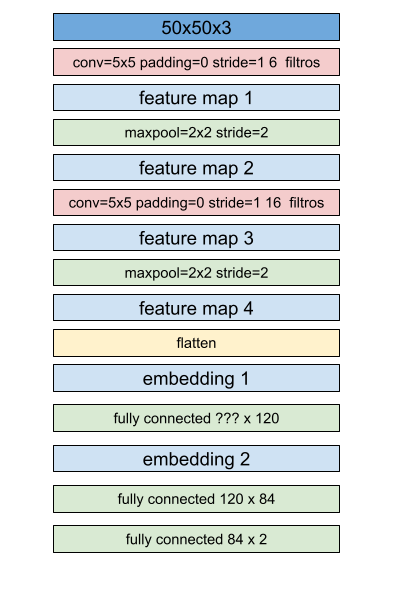

In [ ]:

class LeNet(nn.Module):
    def __init__(self):
        super(LeNet,self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3,out_channels=6,kernel_size=5,stride=1,padding=0)
        self.conv2 = nn.Conv2d(in_channels=6,out_channels=16,kernel_size=5,stride=1,padding=0)
        self.relu = nn.ReLU()
        self.maxpool = nn.MaxPool2d(kernel_size=2,stride=2,padding=0)
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(1296,120)
        self.fc2 = nn.Linear(120,84)
        self.fc3 = nn.Linear(84,5)

    def forward(self,x):
        x = self.conv1(x)
        x = self.relu(x)
        x = self.maxpool(x)
        x = self.conv2(x)
        x = self.relu(x)
        x = self.maxpool(x)
        x = self.flatten(x)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.fc3(x)

        return x

In [ ]:
model = LeNet()

In [ ]:
model

LeNet(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (relu): ReLU()
  (maxpool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=1296, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=5, bias=True)
)

In [ ]:
import torchsummary

In [ ]:
torchsummary.summary(model,(3,50,50),device='cpu')

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 6, 46, 46]             456
              ReLU-2            [-1, 6, 46, 46]               0
         MaxPool2d-3            [-1, 6, 23, 23]               0
            Conv2d-4           [-1, 16, 19, 19]           2,416
              ReLU-5           [-1, 16, 19, 19]               0
         MaxPool2d-6             [-1, 16, 9, 9]               0
           Flatten-7                 [-1, 1296]               0
            Linear-8                  [-1, 120]         155,640
              ReLU-9                  [-1, 120]               0
           Linear-10                   [-1, 84]          10,164
             ReLU-11                   [-1, 84]               0
           Linear-12                    [-1, 5]             425
Total params: 169,101
Trainable params: 169,101
Non-trainable params: 0
-------------------------------

In [ ]:
#model[11] = nn.Linear(84,10)

In [ ]:
model

LeNet(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (relu): ReLU()
  (maxpool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=1296, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=5, bias=True)
)

In [ ]:
import torchsummary

In [ ]:
x = torch.randn(10,3,50,50)

In [ ]:
model = LeNet()


In [ ]:
model(x)

tensor([[ 0.0843, -0.1143,  0.0203, -0.0766,  0.0007],
        [ 0.0754, -0.1146,  0.0113, -0.0788,  0.0123],
        [ 0.0912, -0.1457,  0.0033, -0.0711, -0.0043],
        [ 0.0743, -0.1320,  0.0216, -0.0441, -0.0161],
        [ 0.0766, -0.1282,  0.0093, -0.0619, -0.0044],
        [ 0.0772, -0.1274,  0.0106, -0.0563, -0.0052],
        [ 0.1064, -0.1330,  0.0084, -0.0762, -0.0036],
        [ 0.0559, -0.1013,  0.0264, -0.0580, -0.0212],
        [ 0.0900, -0.1227,  0.0158, -0.0565, -0.0028],
        [ 0.0891, -0.1237,  0.0130, -0.0651, -0.0025]],
       grad_fn=<AddmmBackward0>)

In [ ]:
torchsummary.summary(model,(3,50,50),device='cpu')

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 6, 46, 46]             456
              ReLU-2            [-1, 6, 46, 46]               0
         MaxPool2d-3            [-1, 6, 23, 23]               0
            Conv2d-4           [-1, 16, 19, 19]           2,416
              ReLU-5           [-1, 16, 19, 19]               0
         MaxPool2d-6             [-1, 16, 9, 9]               0
           Flatten-7                 [-1, 1296]               0
            Linear-8                  [-1, 120]         155,640
              ReLU-9                  [-1, 120]               0
           Linear-10                   [-1, 84]          10,164
             ReLU-11                   [-1, 84]               0
           Linear-12                    [-1, 5]             425
Total params: 169,101
Trainable params: 169,101
Non-trainable params: 0
-------------------------------

In [ ]:

class LeNet2(nn.Module):
    def __init__(self):
        super(LeNet2,self).__init__()
        self.backbone = nn.Sequential(
            nn.Conv2d(in_channels=3,out_channels=6,kernel_size=5,stride=1,padding=0),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,stride=2,padding=0),
            nn.Conv2d(in_channels=6,out_channels=16,kernel_size=5,stride=1,padding=0),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,stride=2,padding=0),
            nn.Flatten()
        )
        self.classifier = nn.Sequential(
            nn.Linear(1296,120),
            nn.ReLU(),
            nn.Linear(120,84),
            nn.ReLU(),
            nn.Linear(84,2),
        )


    def forward(self,x):
        x = self.backbone(x)
        x = self.classifier(x)
        return x


In [ ]:
model = LeNet2()

In [ ]:
torchsummary.summary(model,(3,50,50),device='cpu')

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 6, 46, 46]             456
              ReLU-2            [-1, 6, 46, 46]               0
         MaxPool2d-3            [-1, 6, 23, 23]               0
            Conv2d-4           [-1, 16, 19, 19]           2,416
              ReLU-5           [-1, 16, 19, 19]               0
         MaxPool2d-6             [-1, 16, 9, 9]               0
           Flatten-7                 [-1, 1296]               0
            Linear-8                  [-1, 120]         155,640
              ReLU-9                  [-1, 120]               0
           Linear-10                   [-1, 84]          10,164
             ReLU-11                   [-1, 84]               0
           Linear-12                    [-1, 2]             170
Total params: 168,846
Trainable params: 168,846
Non-trainable params: 0
-------------------------------

In [ ]:

#model = torchvision.models.mobilenet_v3_large(weights = torchvision.models.MobileNet_V3_Large_Weights.IMAGENET1K_V2)

In [ ]:
model

LeNet2(
  (backbone): Sequential(
    (0): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Flatten(start_dim=1, end_dim=-1)
  )
  (classifier): Sequential(
    (0): Linear(in_features=1296, out_features=120, bias=True)
    (1): ReLU()
    (2): Linear(in_features=120, out_features=84, bias=True)
    (3): ReLU()
    (4): Linear(in_features=84, out_features=2, bias=True)
  )
)

In [ ]:
model

LeNet2(
  (backbone): Sequential(
    (0): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Flatten(start_dim=1, end_dim=-1)
  )
  (classifier): Sequential(
    (0): Linear(in_features=1296, out_features=120, bias=True)
    (1): ReLU()
    (2): Linear(in_features=120, out_features=84, bias=True)
    (3): ReLU()
    (4): Linear(in_features=84, out_features=2, bias=True)
  )
)

In [ ]:
for layer in model.children():
    print(layer)

Sequential(
  (0): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (1): ReLU()
  (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (3): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (4): ReLU()
  (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (6): Flatten(start_dim=1, end_dim=-1)
)
Sequential(
  (0): Linear(in_features=1296, out_features=120, bias=True)
  (1): ReLU()
  (2): Linear(in_features=120, out_features=84, bias=True)
  (3): ReLU()
  (4): Linear(in_features=84, out_features=2, bias=True)
)


In [ ]:
model.classifier

Sequential(
  (0): Linear(in_features=1296, out_features=120, bias=True)
  (1): ReLU()
  (2): Linear(in_features=120, out_features=84, bias=True)
  (3): ReLU()
  (4): Linear(in_features=84, out_features=2, bias=True)
)

# construção do dataset

Abra o browser e faça uma busca sobre a classe desejadan no site http://flickr.com

Na pagina de busca digite `<crtl>-<shift>-j` e no console cole o código abaixo
```
urls =  Array.from(document.querySelectorAll("div.photo-list-photo-container")).map(el => el.firstElementChild.src); window.open('data:text/csv;charset=utf-8,' + escape(urls.join('\n')));
```

Salve o arquivo como csv

Caso tenha adblocker, você precisa desabilitá-lo.

In [ ]:
def download_images(main_dir,urls_filename):
    class_name = urls_filename.split('.')[-2]
    output_dir = main_dir+os.sep+class_name
    os.makedirs(output_dir,exist_ok=True)
    with open(urls_filename) as f:
        for url in f:
            img_filename = url.split('/')[-1].replace("\n","")
            print(img_filename)
            try:
                response = urllib.request.urlopen(url)
                open(output_dir+'/'+img_filename,mode="wb+").write(response.read())
            except:
                print('nao conseguiu baixar ',url)

In [ ]:
!pwd

/content


In [ ]:
main_dir = "/content/drive/MyDrive/carros"

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
os.chdir(main_dir)

In [ ]:
!ls

best_model.pth	fusca  fusca.csv  porche  porche.csv


In [ ]:
#download_images(main_dir,'fusca.csv')

In [ ]:
#download_images(main_dir,'porche.csv')

In [ ]:
device = torch.device('cuda:0')
model.to(device)

LeNet2(
  (backbone): Sequential(
    (0): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Flatten(start_dim=1, end_dim=-1)
  )
  (classifier): Sequential(
    (0): Linear(in_features=1296, out_features=120, bias=True)
    (1): ReLU()
    (2): Linear(in_features=120, out_features=84, bias=True)
    (3): ReLU()
    (4): Linear(in_features=84, out_features=2, bias=True)
  )
)

## construção do loader

In [ ]:
def image_loader(img):
    return Image.open(img).convert("RGB")

In [ ]:
img = image_loader('./porche/5620535118_75fa991f8d_n.jpg')

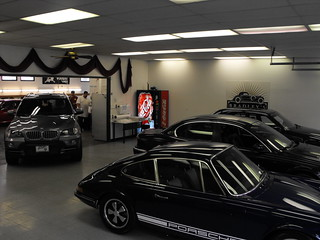

In [ ]:
img

In [ ]:
tconvert = transforms.Resize((50,50))

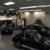

In [ ]:
tconvert(img)

In [ ]:
tconvert2 =  transforms.CenterCrop((227,227))

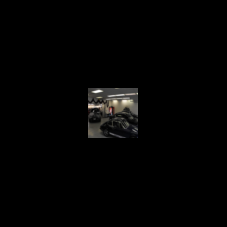

In [ ]:
tconvert2((tconvert(img)))

In [ ]:
transform = transforms.Compose([transforms.Resize((250,250)),
                                transforms.CenterCrop((227,227)),
                                transforms.ToTensor(),
                                transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
                            ])

In [ ]:
#transform = transforms.Compose([transforms.Resize((50,50)),
#                                transforms.ToTensor(),
#                                transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
#                            ])

In [ ]:
img_tensor = transform(img)

In [ ]:
img_tensor.shape

torch.Size([3, 227, 227])

## Construção da classe Dataset

In [ ]:
!ls

best_model.pth	fusca  fusca.csv  porche  porche.csv


In [ ]:
dir = './'

In [ ]:
for file_names in os.scandir('./'):
    print(file_names)

<DirEntry 'fusca.csv'>
<DirEntry 'porche.csv'>
<DirEntry 'fusca'>
<DirEntry 'porche'>
<DirEntry 'best_model.pth'>


In [ ]:
classes = [d.name for d in os.scandir(dir) if d.is_dir()]

In [ ]:
classes

['fusca', 'porche']

In [ ]:
class_to_idx = {cls_name: i for i, cls_name in enumerate(classes)}

In [ ]:
class_to_idx

{'fusca': 0, 'porche': 1}

In [ ]:
instances = []
for target_class in sorted(class_to_idx.keys()):
        class_index = class_to_idx[target_class]
        target_dir = os.path.join(dir, target_class)
        for root, _, fnames in sorted(os.walk(target_dir, followlinks=True)):
            for fname in sorted(fnames):
                path = os.path.join(root, fname)
                item = path, class_index
                instances.append(item)

In [ ]:
instances

[('./fusca/110071897_1a7fc9ad7f_w.jpg', 0),
 ('./fusca/12485732775_ffe4f8256e_m.jpg', 0),
 ('./fusca/12486187053_18d37067c8_n.jpg', 0),
 ('./fusca/1254758682_4677d1c2cf_n.jpg', 0),
 ('./fusca/134818392_960dee32ab_n.jpg', 0),
 ('./fusca/1360985881_17b8e7abb2_n.jpg', 0),
 ('./fusca/1375205542_88662a4f45_n.jpg', 0),
 ('./fusca/1400491752_6f2b60718d_n.jpg', 0),
 ('./fusca/1414205931_14ee3a2814_n.jpg', 0),
 ('./fusca/14634828237_33d61456e2_m.jpg', 0),
 ('./fusca/14818334411_7c6c81ffc1_n.jpg', 0),
 ('./fusca/14822749758_43732a0912_w.jpg', 0),
 ('./fusca/14835216419_4fd2cf0fc8_n.jpg', 0),
 ('./fusca/14835463017_602937fc3f_n.jpg', 0),
 ('./fusca/14835481498_7a2e6e13dc_n.jpg', 0),
 ('./fusca/14835553517_5d999f5bde_n.jpg', 0),
 ('./fusca/14835621257_98d246ce64_n.jpg', 0),
 ('./fusca/14835648748_97e8e2ee72_n.jpg', 0),
 ('./fusca/14835659210_dfe6e8801f_n.jpg', 0),
 ('./fusca/14835664217_f995f7306b_n.jpg', 0),
 ('./fusca/14835669270_6aba28cbbb_n.jpg', 0),
 ('./fusca/14835699377_5679dde962_n.jpg', 0

In [ ]:
from torch.utils.data import Dataset

from typing import Any,Tuple

class CarrosDataset(Dataset):
    def __init__(self,dir,transform=None,target_transform=None,loader = None):
        self.main_dir = dir
        self.transform = transform
        self.target_transform = target_transform
        self.classes = [d.name for d in os.scandir(dir) if d.is_dir()]
        self.classes.sort()
        self.class_to_idx = {cls_name: i for i, cls_name in enumerate(self.classes)}
        self.targets = []
        self.instances = self.make_instances()
        self.loader = loader

        if loader is None:
            self.loader = lambda x: Image.open(x).convert('RGB')

    def make_instances(self):
        instances = []
        targets = []
        for target_class in sorted(self.class_to_idx.keys()):
                class_index = self.class_to_idx[target_class]
                target_dir = os.path.join(self.main_dir, target_class)
                for root, _, fnames in sorted(os.walk(target_dir, followlinks=True)):
                    for fname in sorted(fnames):
                        path = os.path.join(root, fname)
                        item = path, class_index
                        targets.append(class_index)
                        instances.append(item)
        self.targets = torch.tensor(targets)
        return instances
    def __getitem__(self,index:int) -> Tuple[Any,Any]:
        path, target = self.instances[index]
        instance = self.loader(path)
        if self.transform is not None:
            instance = self.transform(instance)
        if self.target_transform is not None:
            target = self.target_transform(target)
        return instance,target
    def __len__(self) -> int:
        return len(self.instances)



In [ ]:
dataset = CarrosDataset('./',transform=transform)

In [ ]:
dataset[0]

(tensor([[[ 0.9132,  0.9303,  0.9646,  ...,  0.6221,  0.3652,  0.3481],
          [ 0.8961,  0.9132,  0.9303,  ...,  0.6563,  0.3481,  0.3138],
          [ 0.8961,  0.9132,  0.8961,  ...,  0.6563,  0.3138,  0.3138],
          ...,
          [ 0.2967,  0.4337,  0.4679,  ...,  0.5707,  0.2111,  0.4679],
          [-0.0458,  0.1597,  0.0912,  ...,  0.4508,  0.3823,  0.5022],
          [-0.0458,  0.0056,  0.1083,  ...,  0.0741,  0.1939,  0.3652]],
 
         [[ 1.4657,  1.4832,  1.5182,  ..., -0.2325, -0.5476, -0.5826],
          [ 1.4482,  1.4657,  1.4832,  ..., -0.1975, -0.5826, -0.6001],
          [ 1.4482,  1.4657,  1.4482,  ..., -0.1975, -0.6176, -0.6176],
          ...,
          [ 0.4853,  0.6254,  0.6604,  ...,  0.8004,  0.4328,  0.6954],
          [ 0.1352,  0.3452,  0.2752,  ...,  0.6779,  0.6078,  0.7129],
          [ 0.1352,  0.1877,  0.2927,  ...,  0.2927,  0.4153,  0.5728]],
 
         [[ 1.5245,  1.5594,  1.5942,  ..., -0.8284, -1.1770, -1.1421],
          [ 1.5245,  1.5420,

In [ ]:
dataset.instances

[('./fusca/110071897_1a7fc9ad7f_w.jpg', 0),
 ('./fusca/12485732775_ffe4f8256e_m.jpg', 0),
 ('./fusca/12486187053_18d37067c8_n.jpg', 0),
 ('./fusca/1254758682_4677d1c2cf_n.jpg', 0),
 ('./fusca/134818392_960dee32ab_n.jpg', 0),
 ('./fusca/1360985881_17b8e7abb2_n.jpg', 0),
 ('./fusca/1375205542_88662a4f45_n.jpg', 0),
 ('./fusca/1400491752_6f2b60718d_n.jpg', 0),
 ('./fusca/1414205931_14ee3a2814_n.jpg', 0),
 ('./fusca/14634828237_33d61456e2_m.jpg', 0),
 ('./fusca/14818334411_7c6c81ffc1_n.jpg', 0),
 ('./fusca/14822749758_43732a0912_w.jpg', 0),
 ('./fusca/14835216419_4fd2cf0fc8_n.jpg', 0),
 ('./fusca/14835463017_602937fc3f_n.jpg', 0),
 ('./fusca/14835481498_7a2e6e13dc_n.jpg', 0),
 ('./fusca/14835553517_5d999f5bde_n.jpg', 0),
 ('./fusca/14835621257_98d246ce64_n.jpg', 0),
 ('./fusca/14835648748_97e8e2ee72_n.jpg', 0),
 ('./fusca/14835659210_dfe6e8801f_n.jpg', 0),
 ('./fusca/14835664217_f995f7306b_n.jpg', 0),
 ('./fusca/14835669270_6aba28cbbb_n.jpg', 0),
 ('./fusca/14835699377_5679dde962_n.jpg', 0

In [ ]:
len(dataset)

628

In [ ]:
np.unique(dataset.targets,return_counts=True)

(array([0, 1]), array([357, 271]))

In [ ]:
#dataset = torchvision.datasets.DatasetFolder('./',loader = image_loader,extensions='jpg',transform=transform )

In [ ]:
dataset.targets = torch.tensor(dataset.targets)

<ipython-input-66-7100d4d21687>:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  dataset.targets = torch.tensor(dataset.targets)


# Treinamento da rede

In [ ]:
ds = dataset

In [ ]:
ds[400][1]

1

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
np.unique(ds.targets,return_counts=True)

(array([0, 1]), array([357, 271]))

In [ ]:
ds

In [ ]:
bs = 1
train_idx, temp_idx = train_test_split(np.arange(len(ds)),test_size=0.3,shuffle=True,stratify=ds.targets)
valid_idx, test_idx = train_test_split(temp_idx,test_size=0.5,shuffle=True,stratify=ds.targets[temp_idx])

train_sampler = torch.utils.data.SubsetRandomSampler(train_idx)
valid_sampler = torch.utils.data.SubsetRandomSampler(valid_idx)
test_sampler  = torch.utils.data.SubsetRandomSampler(test_idx)

dl_train = torch.utils.data.DataLoader(ds,batch_size=bs,sampler=train_sampler)
dl_valid = torch.utils.data.DataLoader(ds,batch_size=bs,sampler=valid_sampler)
dl_test  = torch.utils.data.DataLoader(ds,batch_size=bs,sampler=test_sampler)

In [ ]:

np.unique(ds.targets[train_idx],return_counts=True)

(array([0, 1]), array([250, 189]))

In [ ]:
np.unique(ds.targets[valid_idx],return_counts=True)

(array([0, 1]), array([53, 41]))

In [ ]:
np.unique(ds.targets[test_idx],return_counts=True)

(array([0, 1]), array([54, 41]))

In [ ]:
x,y = next(iter(dl_train))

In [ ]:
x.shape,y.shape

(torch.Size([64, 3, 227, 227]), torch.Size([64]))

In [ ]:
device = torch.device('cuda:0') if torch.cuda.is_available() else torch.device('cpu')

In [ ]:
device

device(type='cuda', index=0)

In [ ]:
torch.cuda.get_device_properties(0)

_CudaDeviceProperties(name='Tesla T4', major=7, minor=5, total_memory=15101MB, multi_processor_count=40)

In [ ]:
x.to(device)

tensor([[[[-1.4500, -1.4500, -1.4500,  ..., -0.7993, -0.7822, -0.7479],
          [-1.4672, -1.4672, -1.4672,  ..., -0.7993, -0.7822, -0.7650],
          [-1.4500, -1.4500, -1.4500,  ..., -0.7993, -0.7822, -0.7650],
          ...,
          [ 0.2453,  0.2453,  0.2624,  ..., -1.0562, -1.0733, -1.0733],
          [ 0.2453,  0.2453,  0.2282,  ..., -1.0562, -1.0733, -1.0733],
          [ 0.2111,  0.2111,  0.2111,  ..., -1.0562, -1.0733, -1.0904]],

         [[-1.2129, -1.2129, -1.2129,  ..., -0.5826, -0.5826, -0.5476],
          [-1.2479, -1.2479, -1.2479,  ..., -0.5826, -0.5826, -0.5651],
          [-1.2654, -1.2654, -1.2654,  ..., -0.5826, -0.5826, -0.5476],
          ...,
          [ 0.0826,  0.0826,  0.1001,  ..., -1.1954, -1.1954, -1.1954],
          [ 0.0826,  0.0826,  0.0651,  ..., -1.1954, -1.1954, -1.1954],
          [ 0.0476,  0.0476,  0.0476,  ..., -1.2129, -1.1954, -1.2129]],

         [[-1.3861, -1.3861, -1.3861,  ..., -1.0898, -1.0724, -1.0376],
          [-1.4036, -1.4036, -

In [ ]:
device

device(type='cuda', index=0)

In [ ]:
torch.cuda.get_device_properties(0)

_CudaDeviceProperties(name='Tesla T4', major=7, minor=5, total_memory=15101MB, multi_processor_count=40)

In [ ]:
#model = torchvision.models.mobilenet_v3_small(weights=torchvision.models.mobilenet.MobileNet_V3_Small_Weights)

In [ ]:
#model

In [ ]:
#model.classifier[3] = nn.Linear(1024,2)

In [ ]:
model = torchvision.models.efficientnet_v2_s(pretrained=True)
model.classifier[1] = nn.Linear(1280,2)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=EfficientNet_V2_S_Weights.IMAGENET1K_V1`. You can also use `weights=EfficientNet_V2_S_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [ ]:
model.to(device)

EfficientNet(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 24, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(24, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
      (2): SiLU(inplace=True)
    )
    (1): Sequential(
      (0): FusedMBConv(
        (block): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(24, 24, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
            (1): BatchNorm2d(24, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
            (2): SiLU(inplace=True)
          )
        )
        (stochastic_depth): StochasticDepth(p=0.0, mode=row)
      )
      (1): FusedMBConv(
        (block): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(24, 24, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
            (1): BatchNorm2d(24, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  

In [ ]:
loss_train = []
loss_eval  = []

In [ ]:
patience_time = 15

In [ ]:
criterion = nn.CrossEntropyLoss()
opt = optim.SGD(model.parameters(),lr=0.01)

In [ ]:
#!pip install wandb
#!wandb login

In [ ]:
#import wandb

#wandb.init(project="treinoLIA", entity="lablia")

In [ ]:
#!wandb login --relogin

In [ ]:
epochs = 100

stop = False
epoch = 0
lowest_loss_eval = 10000
last_best_result = 0
while (not stop):
    #wandb.watch(model)
    model.train()
    lloss = []
    for x,y in dl_train:
        x = x.to(device)
        y = y.to(device)
        pred = model(x)
        closs = criterion(pred,y)
        closs.backward()
        opt.step()
        opt.zero_grad()
        lloss.append(closs.item())
        #print(closs.item())
    loss_train.append(np.mean(lloss))
    lloss = []
    model.eval()
    lres = []
    ytrue = []
    with torch.no_grad():
        for data,y in dl_valid:
            data = data.to(device)

            pred = model(data)
            closs = criterion(pred.cpu(),y)
            lloss.append(closs.item())
            res  = pred.argmax(dim=1).cpu().tolist()
            lres += res
            ytrue += y
    avg_loss_eval = np.mean(lloss)
    loss_eval.append(avg_loss_eval)
    #wandb.log({"loss_eval": avg_loss_eval,"loss_train":loss_train[-1]})
    if avg_loss_eval < lowest_loss_eval:
        lowest_loss_eval = avg_loss_eval
        last_best_result = 0
        print("Best model found! saving...")
        actual_state = {'optim':opt.state_dict(),'model':model.state_dict(),'epoch':epoch,'loss_train':loss_train,'loss_eval':loss_eval}
        torch.save(actual_state,'best_model.pth')
    last_best_result += 1
    if last_best_result > patience_time:
        stop = True
    print("epoch %d loss_train %4.3f loss_eval %4.3f last_best %d"%(epoch,loss_train[-1],loss_eval[-1],last_best_result))
    epoch += 1

Best model found! saving...
epoch 0 loss_train 0.510 loss_eval 0.558 last_best 1
epoch 1 loss_train 0.266 loss_eval 5679.568 last_best 2
epoch 2 loss_train 0.196 loss_eval 785.707 last_best 3
Best model found! saving...
epoch 3 loss_train 0.063 loss_eval 0.373 last_best 1
Best model found! saving...
epoch 4 loss_train 0.057 loss_eval 0.335 last_best 1
Best model found! saving...
epoch 5 loss_train 0.060 loss_eval 0.306 last_best 1
epoch 6 loss_train 0.068 loss_eval 0.490 last_best 2
epoch 7 loss_train 0.144 loss_eval 739.212 last_best 3
epoch 8 loss_train 0.028 loss_eval 627.841 last_best 4
epoch 9 loss_train 0.004 loss_eval 612.135 last_best 5
epoch 10 loss_train 0.001 loss_eval 931.257 last_best 6
epoch 11 loss_train 0.001 loss_eval 985.533 last_best 7
epoch 12 loss_train 0.001 loss_eval 611.632 last_best 8
epoch 13 loss_train 0.001 loss_eval 679.848 last_best 9
epoch 14 loss_train 0.001 loss_eval 1715.959 last_best 10
epoch 15 loss_train 0.001 loss_eval 1471.749 last_best 11
epoch 1

In [ ]:
recover = torch.load('best_model.pth')
#actual_state = {'optim':opt.state_dict(),'model':model.state_dict(),'epoch':epoch}

In [ ]:
opt.load_state_dict(recover['optim'])
model.load_state_dict(recover['model'])
loss_train = recover['loss_train']
loss_eval = recover['loss_eval']
epoch = recover['epoch']

In [ ]:
epoch

37

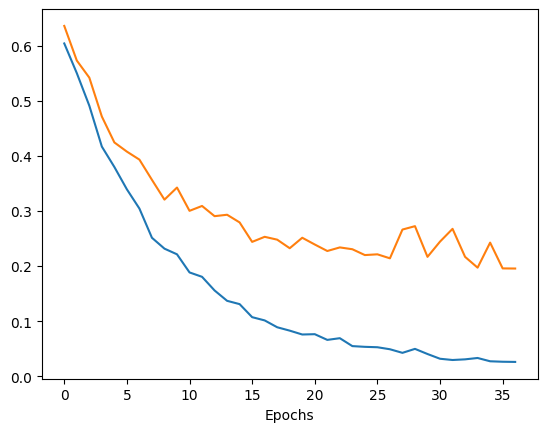

In [ ]:
import matplotlib.pyplot as plt


fig = plt.figure()
plt.plot(loss_train[1:])
plt.plot(loss_eval[1:])
plt.xlabel('Epochs')
plt.show()

In [ ]:
import sklearn.metrics as metrics

In [ ]:
model.to(device)

EfficientNet(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 24, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(24, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
      (2): SiLU(inplace=True)
    )
    (1): Sequential(
      (0): FusedMBConv(
        (block): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(24, 24, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
            (1): BatchNorm2d(24, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
            (2): SiLU(inplace=True)
          )
        )
        (stochastic_depth): StochasticDepth(p=0.0, mode=row)
      )
      (1): FusedMBConv(
        (block): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(24, 24, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
            (1): BatchNorm2d(24, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  

In [ ]:
model.eval()
lres = []
ytrue = []
with torch.no_grad():
    for data,target in dl_test:
        data = data.to(device)
        pred = model(data)
        res  = pred.argmax(dim=1).cpu().tolist()
        lres += res
        ytrue += target

In [ ]:
metrics.confusion_matrix(ytrue,lres)

array([[52,  2],
       [ 8, 33]])

In [ ]:
metrics.accuracy_score(ytrue,lres)

0.8947368421052632

In [ ]:
metrics.precision_score(ytrue,lres)

0.9428571428571428

In [ ]:
metrics.recall_score(ytrue,lres)

0.8048780487804879

In [ ]:
metrics.f1_score(ytrue,lres)

0.868421052631579

In [ ]:
print(metrics.classification_report(ytrue,lres))

              precision    recall  f1-score   support

           0       0.87      0.96      0.91        54
           1       0.94      0.80      0.87        41

    accuracy                           0.89        95
   macro avg       0.90      0.88      0.89        95
weighted avg       0.90      0.89      0.89        95



# Visualização de imagem e predição

In [ ]:
img = image_loader('./fusca/2889544013_9b12d7d5f0_n.jpg')

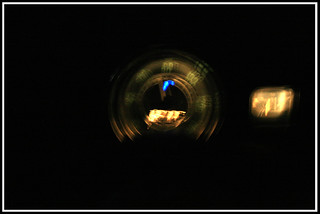

In [ ]:
img

In [ ]:
x = transform(img)

In [ ]:
x.shape

torch.Size([3, 227, 227])

In [ ]:
x = x.view(1,3,227,227)

In [ ]:
x.shape

torch.Size([1, 3, 227, 227])

In [ ]:
x = x.to(device)

In [ ]:
pred = model(x)

In [ ]:
pred

tensor([[ 2.0946, -1.6631]], device='cuda:0', grad_fn=<AddmmBackward0>)

In [ ]:
import torchvision.models as models



model = models.mobilenet_v3_small(pretrained=True)
model.classifier[3] = nn.Linear(1024,2)

In [ ]:

model = models.efficientnet_v2_s(pretrained=True)
model.classifier[1] = nn.Linear(1280,2)

Atividade: Rodar com SGD, Adam, AdamW e RMSProp.
(1) Mostrar um gráfico comparativo da loss na validação dos diferentes otimizadores e (2) uma tabela comparativa dos resultados de precision, recall e f1 para cada optimizador.

In [ ]:



modules = list(model.features.children())[:-4] # tirando as camadas 11 e 12

len(modules)
model.features = nn.Sequential(*modules)


#for param in model.parameters():
#    param.requires_grad = False

x = torch.randn(10,3,224,224).to(device)
pred = model.avgpool(model.features(x))

pred.shape

input_dim = pred.shape[1]*pred.shape[2]*pred.shape[3]

model.classifier[0] = nn.Linear(input_dim,1024)
model.classifier[3] = nn.Linear(1024,2)

model.to(device)